<a href="https://colab.research.google.com/github/parasgulati8/Data-Analysis/blob/master/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
ls drive/'My Drive'/'Colab Notebooks'/dataset

'Carole Baskin - 03_28_2020_ICH_OUTPUT.json'   Health_Care_Data_train.xlsx
'@Carole_Baskin_stat_social.csv'              'Leda health Assignment'/
 cats_and_dogs/                                questions.csv
 creditcard.csv                                s3.npz
 deepCNN_v6_4G_s1to40_best_model.h5            s3_test.npz
 deepCNN_v6_s3.h5                              subject1to40_4.npz
 Fake.csv                                      True.csv
 GradCAM3.jpg                                  Untitled.ipynb
 GradCAM.jpg


In [5]:
cd drive/'My Drive'/'Colab Notebooks'/dataset

/content/drive/My Drive/Colab Notebooks/dataset


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [0]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [9]:
fake.head()

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

In [10]:
true.head()

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]

Examining the subjects in Fake data

(array([9050.,    0., 6841.,    0., 1570.,    0., 4459.,    0.,  783.,
         778.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

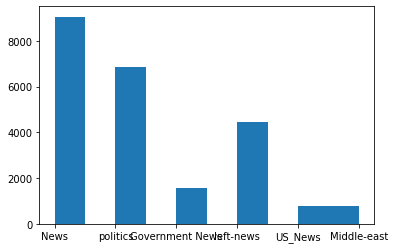

In [15]:
plt.hist(fake.subject)

Examining the subjects in True data

(array([11272.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10145.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

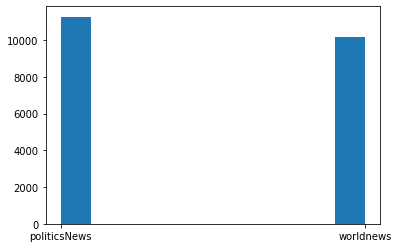

In [16]:
plt.hist(true.subject)

Combining the true and fake news into a single dataframe

In [53]:
fake['target'] = 'fake'
true['target'] = 'true'
news = pd.concat([fake, true]).reset_index(drop = True)
news.head()

title  ... target
0   Donald Trump Sends Out Embarrassing New Year’...  ...   fake
1   Drunk Bragging Trump Staffer Started Russian ...  ...   fake
2   Sheriff David Clarke Becomes An Internet Joke...  ...   fake
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...   fake
4   Pope Francis Just Called Out Donald Trump Dur...  ...   fake

[5 rows x 5 columns]

Combining the title and text columns  

In [0]:
news["text"] = news["title"] + " " + news["text"]

Droppping the unnecessary columns

In [0]:
news.drop(columns=['title', 'subject', 'date'], inplace=True)

In [56]:
news.head()

text target
0   Donald Trump Sends Out Embarrassing New Year’...   fake
1   Drunk Bragging Trump Staffer Started Russian ...   fake
2   Sheriff David Clarke Becomes An Internet Joke...   fake
3   Trump Is So Obsessed He Even Has Obama’s Name...   fake
4   Pope Francis Just Called Out Donald Trump Dur...   fake

Checking the null values

In [26]:
news.isna().sum()

text      0
target    0
dtype: int64

No null values found.

Encoding the label into 0 (Fake) and 1(Real)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
encoder = LabelEncoder()
news['target'] = encoder.fit_transform(news.target)

In [59]:
news.head()

text  target
0   Donald Trump Sends Out Embarrassing New Year’...       0
1   Drunk Bragging Trump Staffer Started Russian ...       0
2   Sheriff David Clarke Becomes An Internet Joke...       0
3   Trump Is So Obsessed He Even Has Obama’s Name...       0
4   Pope Francis Just Called Out Donald Trump Dur...       0

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
news.text.values

array([' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting lik

Creating a Word Cloud out of the mixed data (Real+Fake)

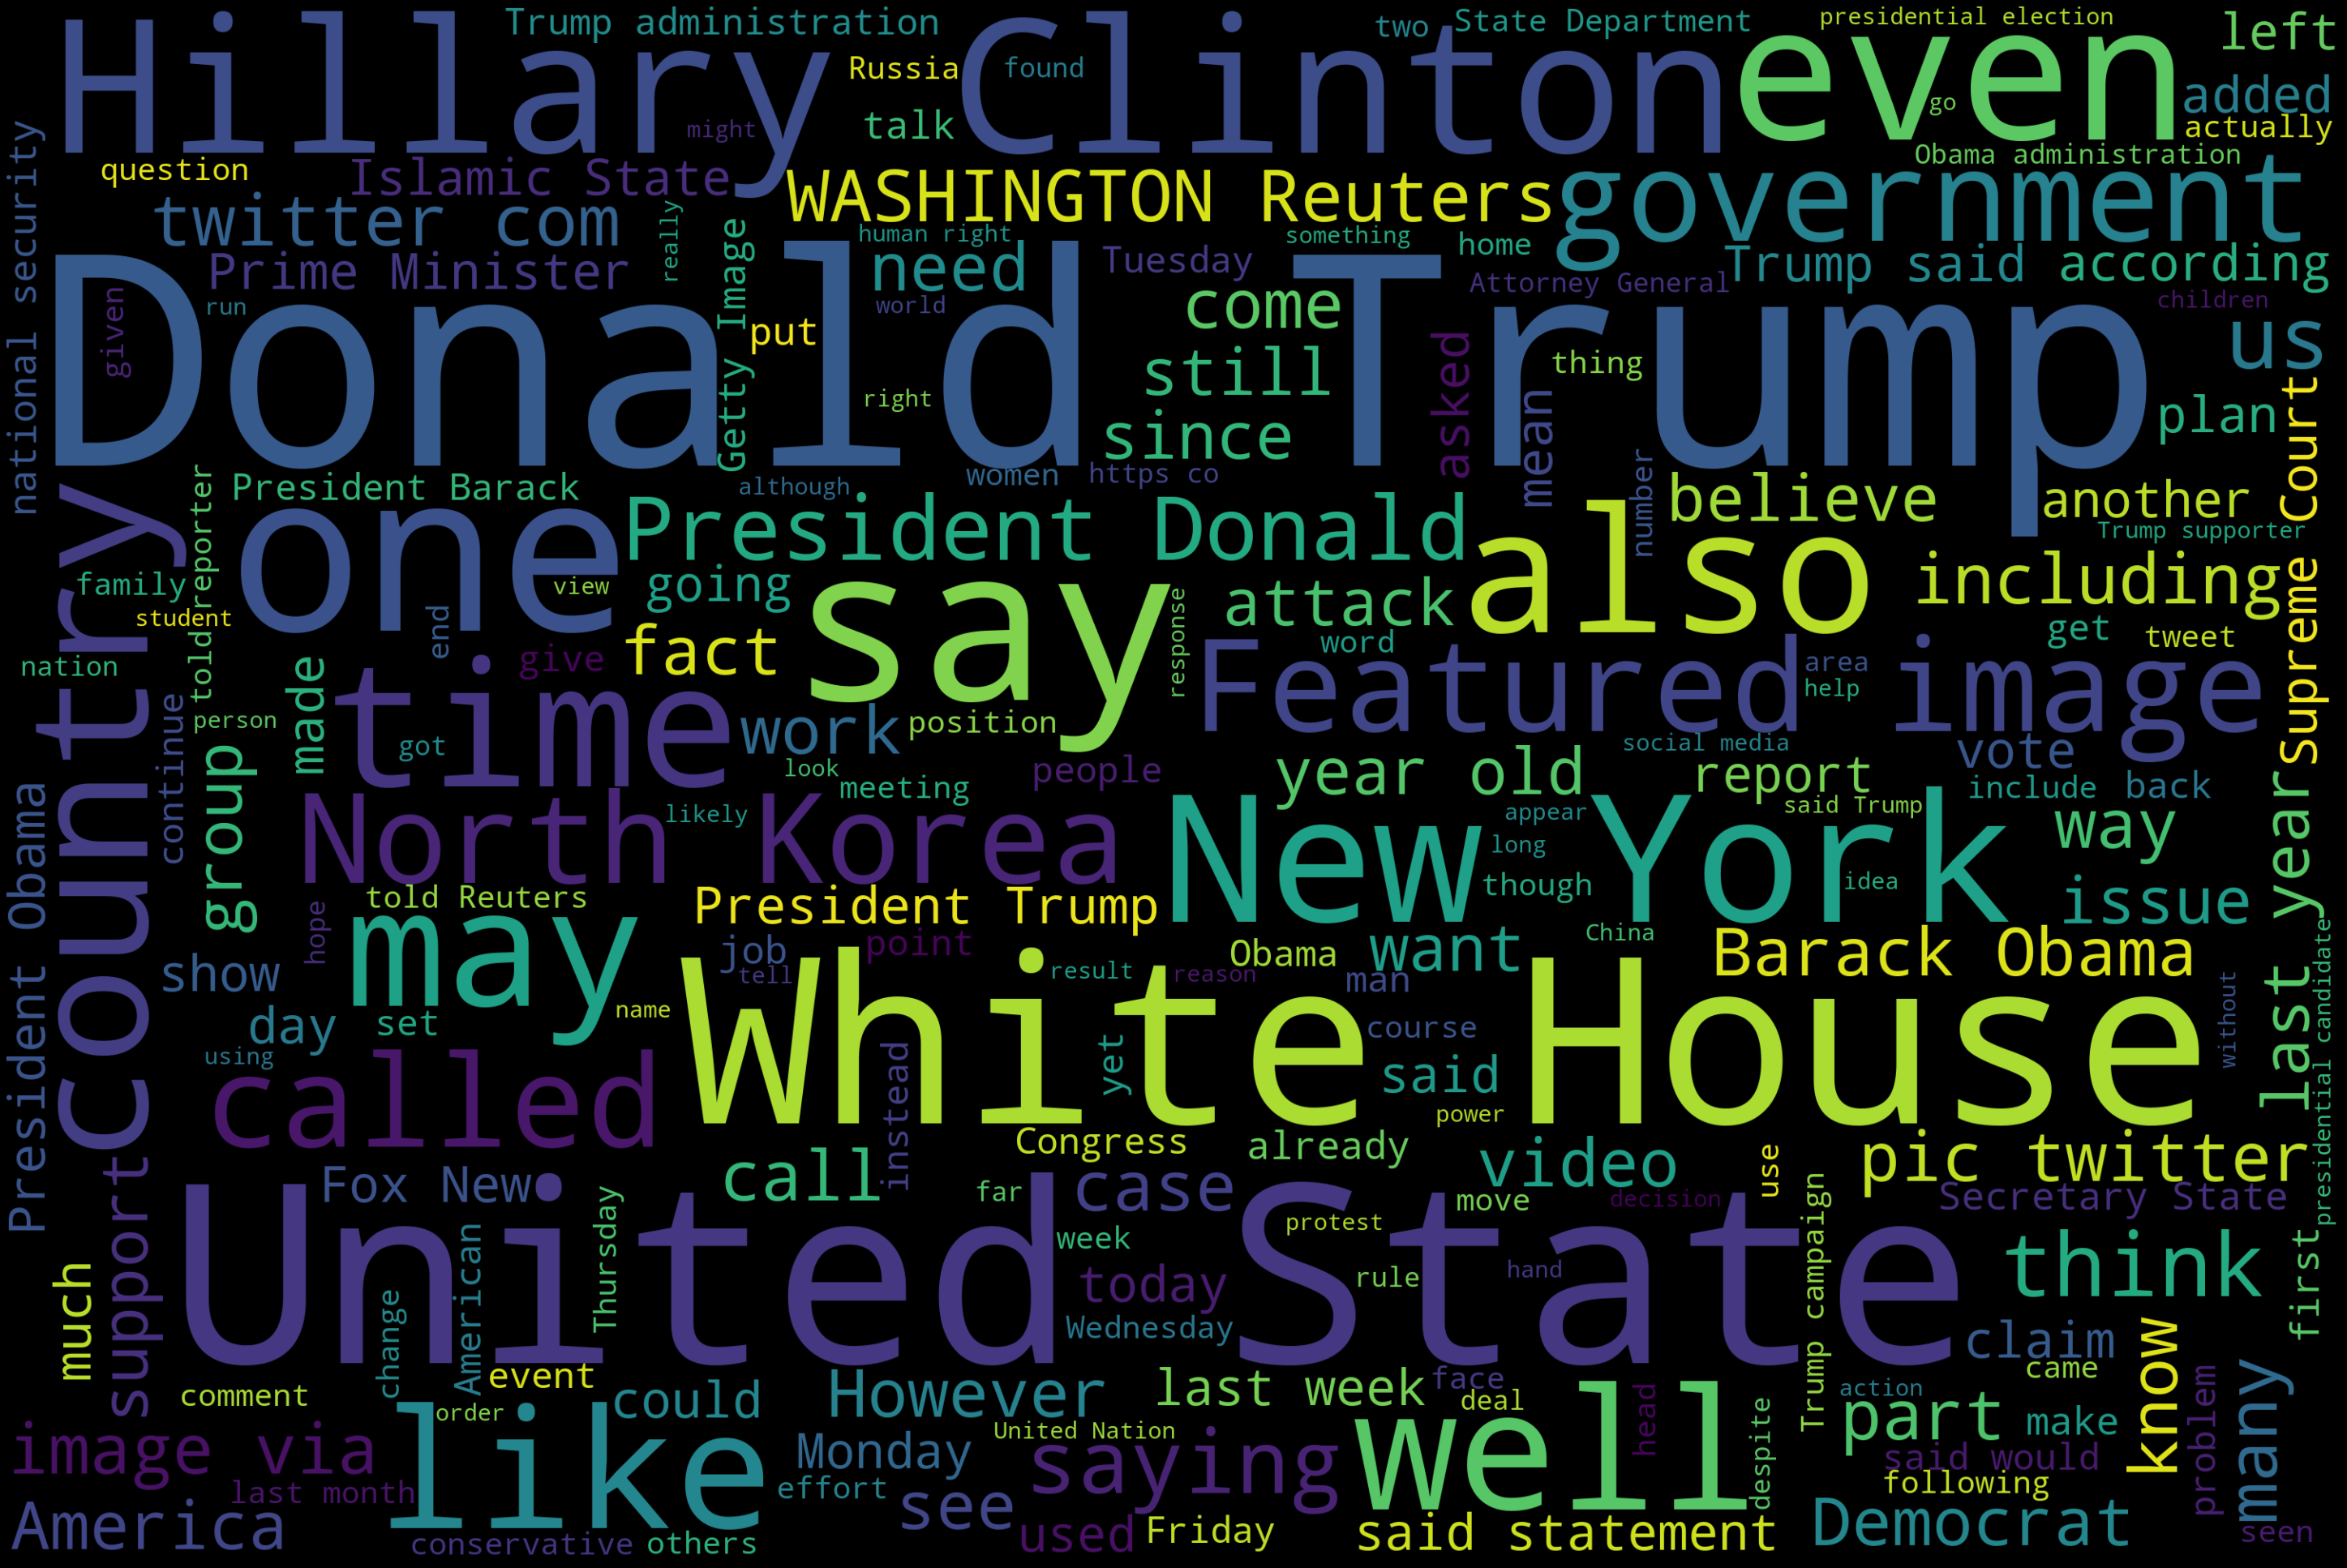

In [62]:
text = ''
for n in news.text.values:
    text += f" {n}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

Creating a word cloud for the Real News

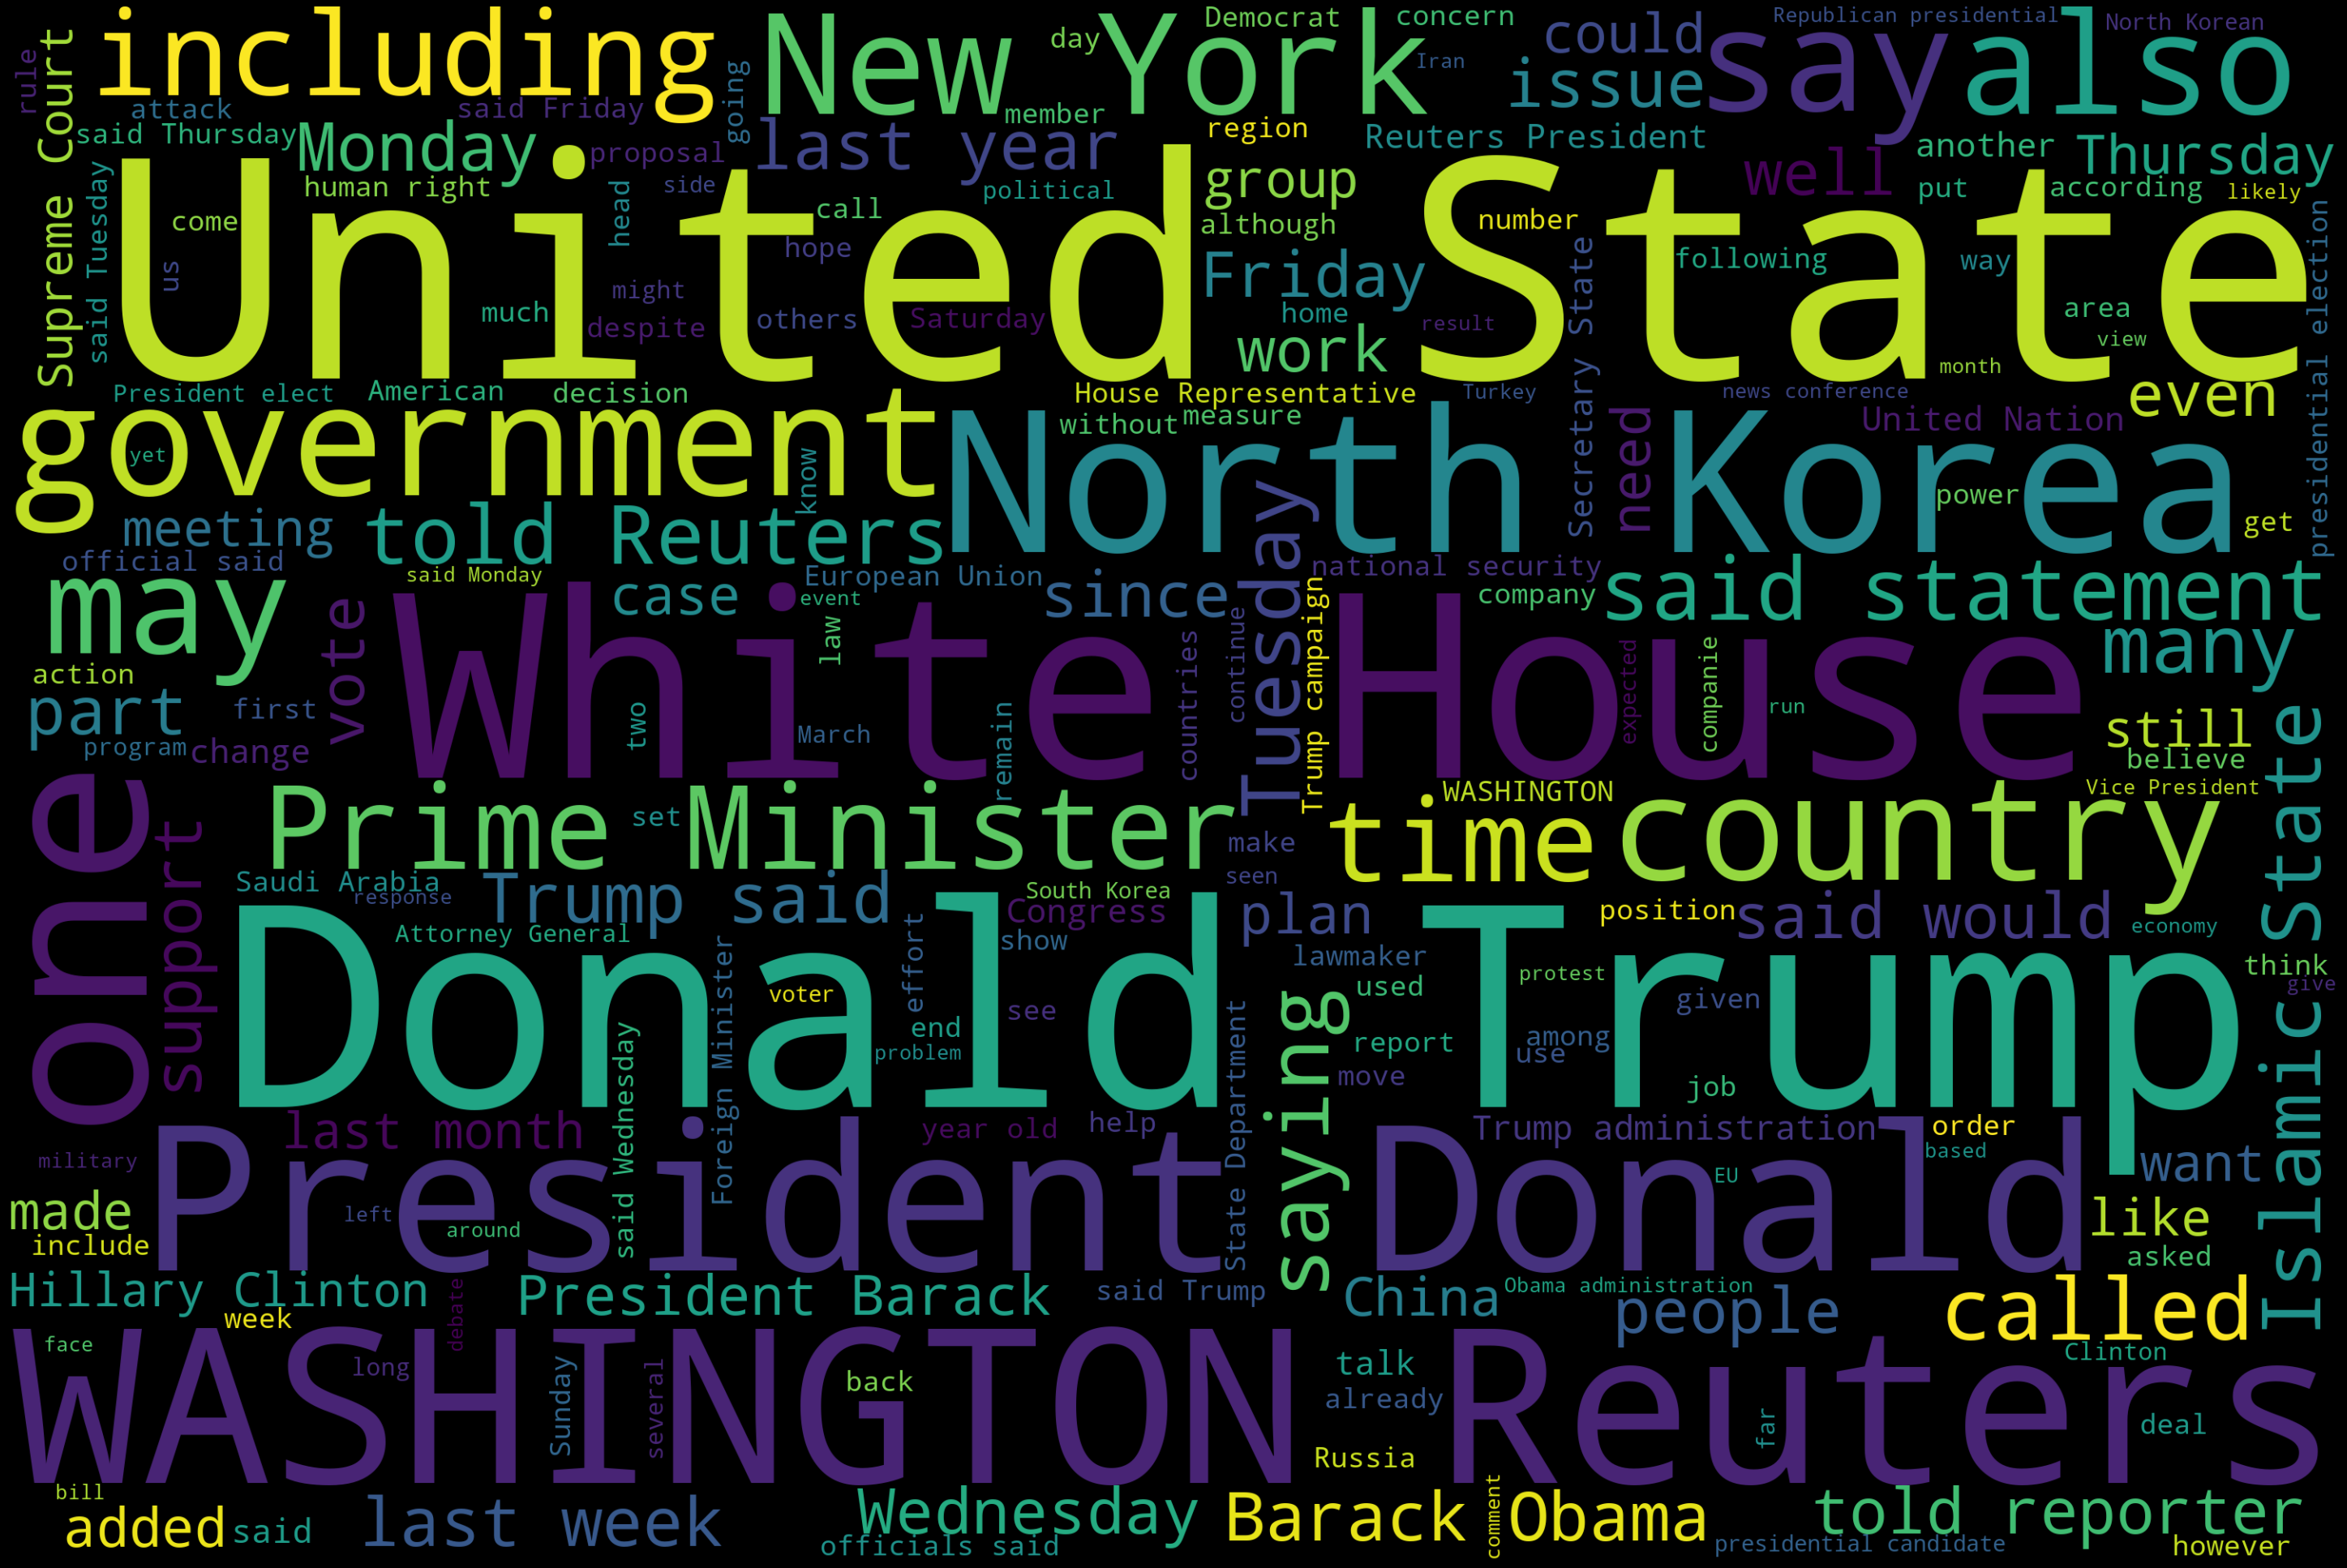

In [45]:
text = ''
for news in true.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

Creating word cloud for Fake News 


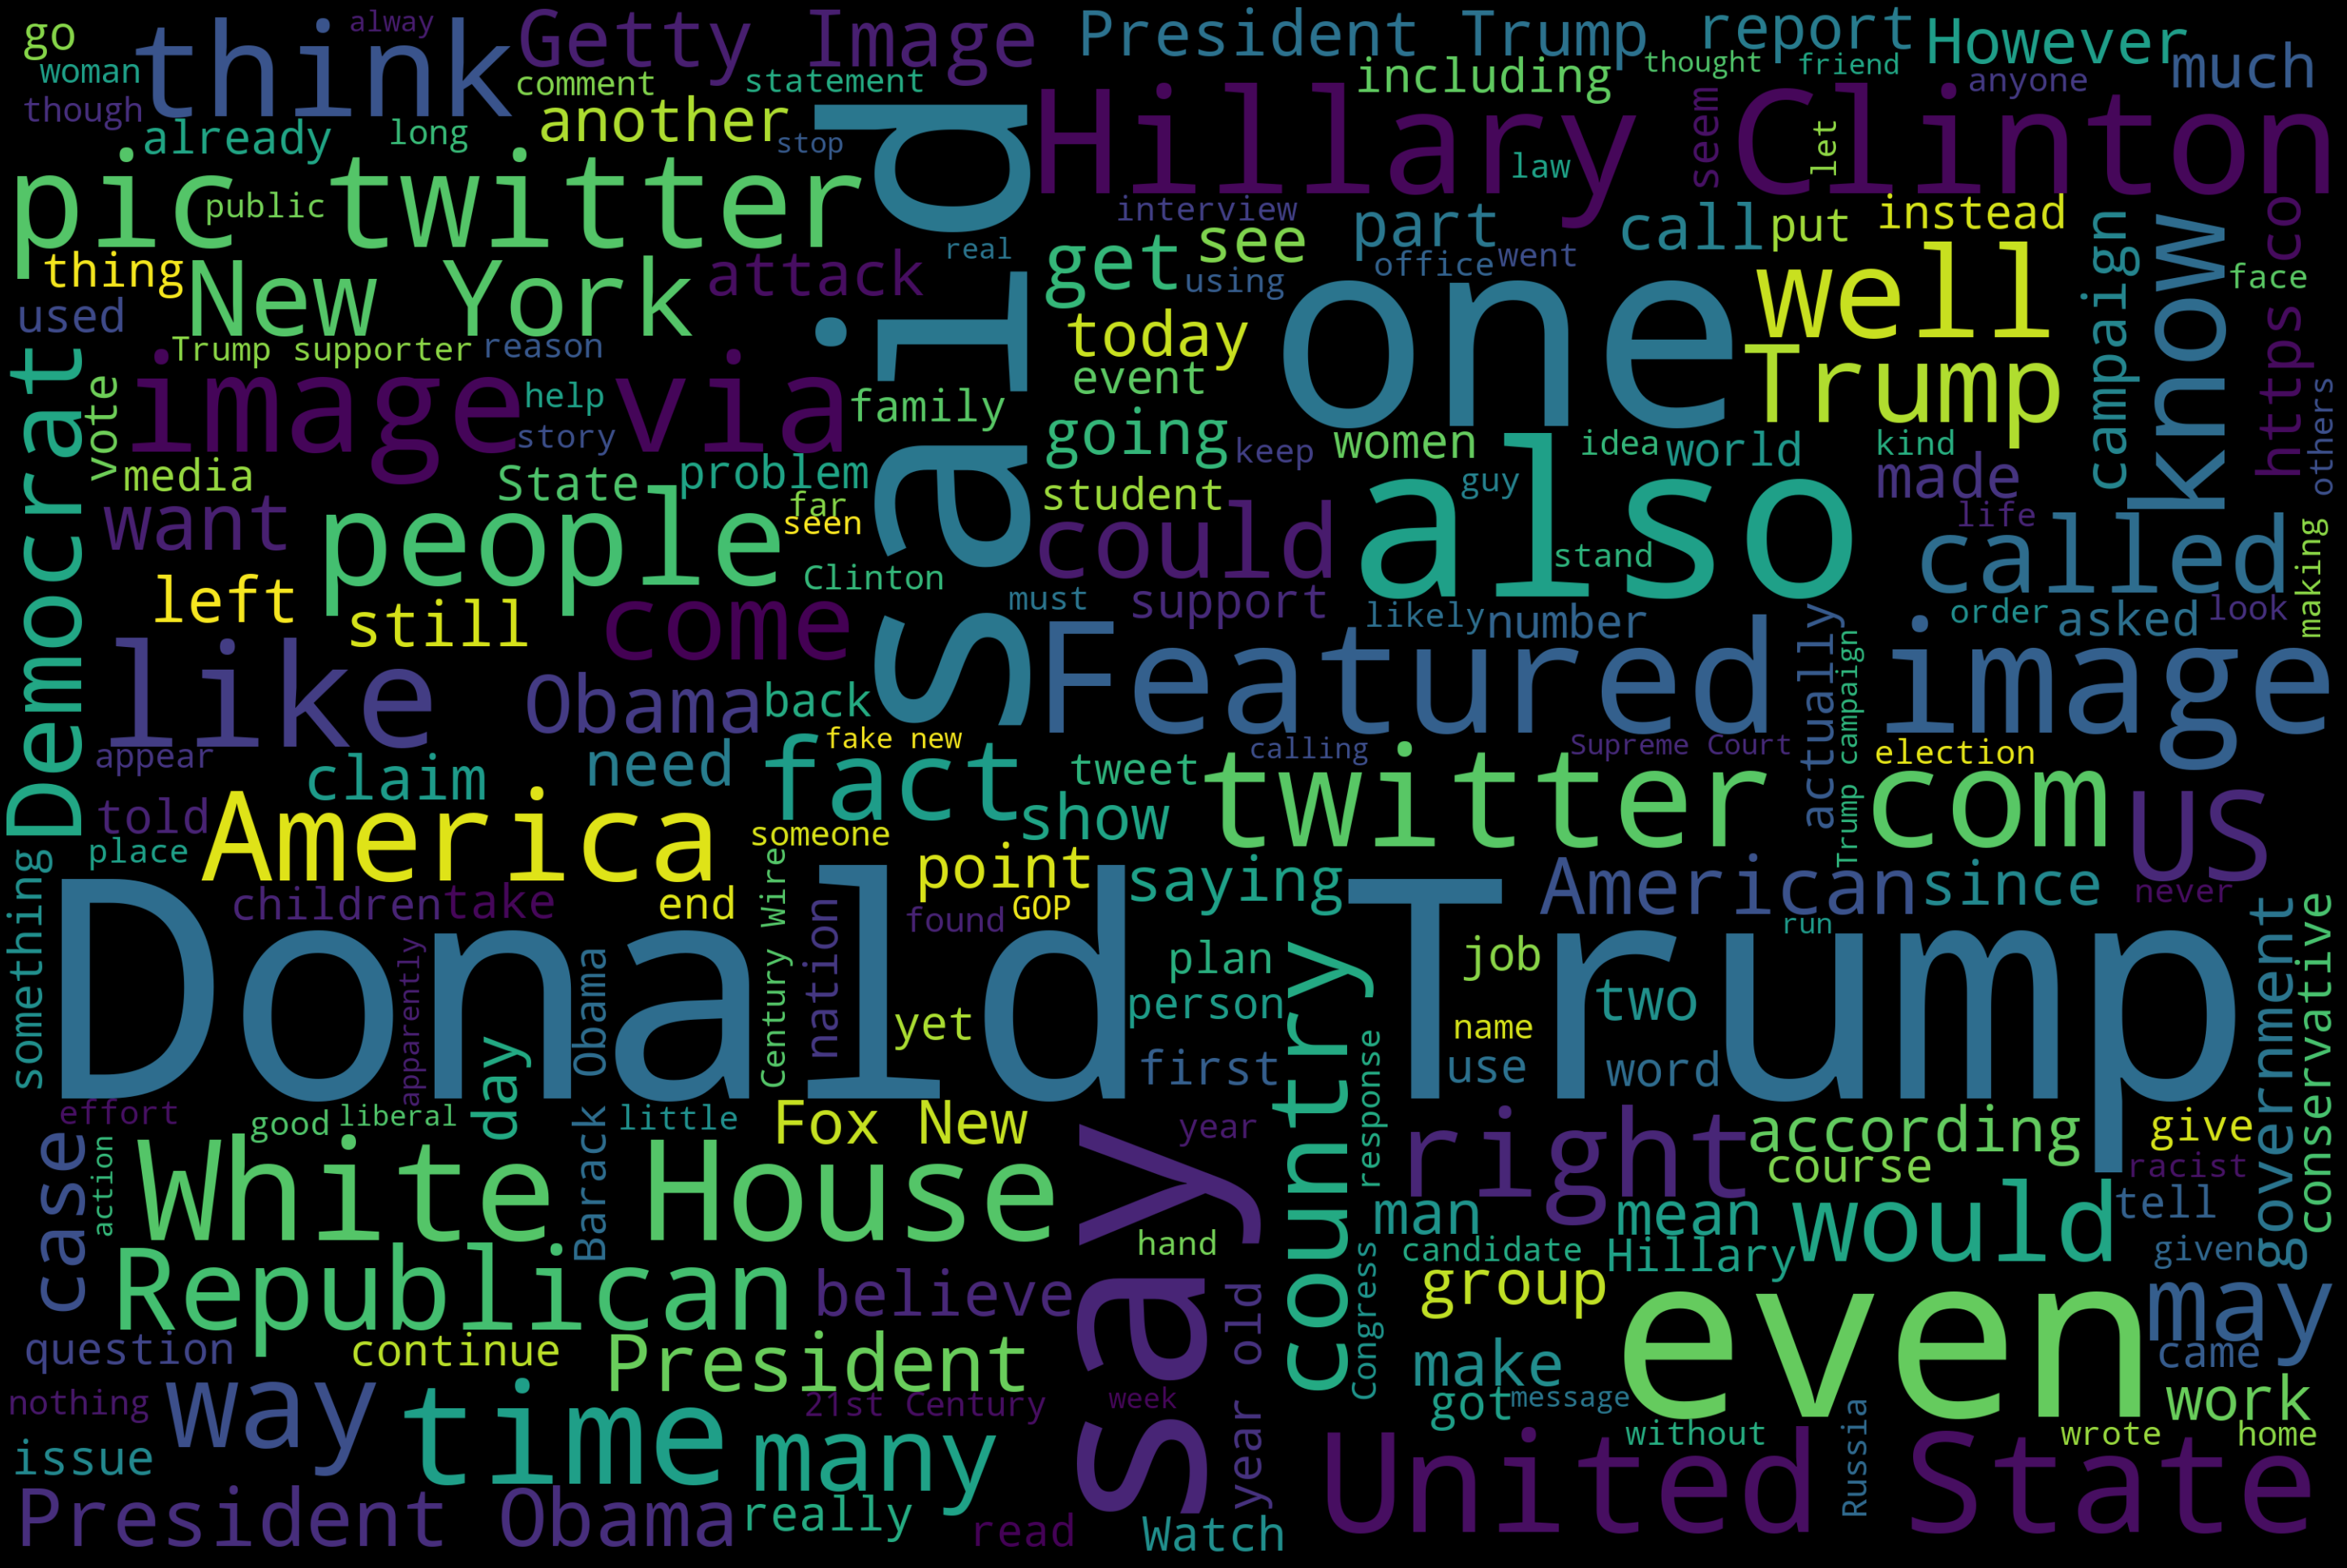

In [46]:
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text